In [2]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import time
import sys
import os
#import matplotlib.pyplot as plt
#%matplotlib inline

In [3]:
def build_model(width, height, depth, classes,drop_out_rate):
	# initialize the input shape and channels dimension to be
	# "channels last" ordering
	inputShape = (height, width, depth)
	chanDim = -1
	# build the model using Keras' Sequential API
	model = Sequential([
		# CONV => RELU => BN => POOL layer set
		Conv2D(16, (3, 3), padding="same", input_shape=inputShape),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		MaxPooling2D(pool_size=(2, 2)),
		# (CONV => RELU => BN) * 2 => POOL layer set
		Conv2D(32, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		Conv2D(32, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		MaxPooling2D(pool_size=(2, 2)),
		# (CONV => RELU => BN) * 3 => POOL layer set
		Conv2D(64, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		Conv2D(64, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		Conv2D(64, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		MaxPooling2D(pool_size=(2, 2)),
		# first (and only) set of FC => RELU layers
		Flatten(),
		Dense(256),
		Activation("relu"),
		BatchNormalization(),
		Dropout(drop_out_rate),
		# softmax classifier
		Dense(classes),
		Activation("softmax")
	])
	# return the built model to the calling function
	return model

In [4]:
model = build_model(28, 28, 3, 6,0.2)

In [5]:
import pandas as pd
df=pd.read_csv("/home/marcpozzo/Desktop/c3po/Images_aquises/generateur.csv")
df=df[(df["class"]=='corneille') | (df["class"]=='pigeon') | (df["class"]=='faisan')   ]
df.drop('labels',inplace=True,axis=1)
df.head()

,class,img_paths
2,corneille,Rec_images/DSCF0180_corneille_2.JPG
3,corneille,Rec_images/DSCF0180_corneille_3.JPG
4,pigeon,Rec_images/DSCF0258_pigeon_4.JPG
8,pigeon,Rec_images/DSCF0335_pigeon_8.JPG
10,pigeon,Rec_images/DSCF0341_pigeon_10.JPG


In [6]:
#Paramètres

#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.2
epochs=200
batch_size = 600
zoom_range = 1.25
horizontal_flip = True
Minimum_Number_Class=100
dropout_rate=0.3
#steps_per_epoch=len(data_train)//batch_size
steps_per_epoch=1
#validation_steps=len(data_test)//batch_size
validation_steps=1


In [10]:

base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Images_aquises/generateur_bigger.csv'

df=pd.read_csv(generateur_path)
df.drop('labels',inplace=True,axis=1)

df["class"].unique()
for c in df:
    print(''+c+':',len(df[c].unique()))
df["class"].unique()


All_Unique=df["class"].unique()
Utilisable=[]
for i in df["class"].unique():
    if df["class"][df["class"]==i].count()>Minimum_Number_Class:
        Utilisable.append(i)
Utilisable
Non_Utilisable=set(All_Unique)-set(Utilisable)
Non_Utilisable
for i in Non_Utilisable:
    df=df[df["class"]!=i]
df=df[df["class"]!="oiseau"]  
df["class"].unique()


for i in range(len(df["class"])):
    image_name=df["img_paths"].iloc[i]
    df["img_paths"].iloc[i]=os.path.join(base_img_paths,image_name)
    

class: 13
img_paths: 6220


In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["acc"])

#model.compile(optimizer='adam',
#                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
#                metrics=['accuracy'])

In [12]:
from numpy.random import seed
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
seed(1)
tf.random.set_seed(2)

data_train,data_test= train_test_split(df,stratify=df["class"], test_size=test_size,random_state=42)
train_data_generator = ImageDataGenerator(
        #preprocessing_function = preprocess_input,
        # data augmentation
        #rotation_range = 10,
        #zoom_range = zoom_range,
        #horizontal_flip = horizontal_flip
        )

test_data_generator = ImageDataGenerator()
    #preprocessing_function = preprocess_input)




train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = len(data_train) )


test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = len(data_test))

gen=train_generator[0]

x_train=gen[0]
y_train=gen[1]



gen_test=test_generator[0]

x_test=gen_test[0]
y_test=gen_test[1]


Using TensorFlow backend.


Found 4772 validated image filenames belonging to 6 classes.
Found 1194 validated image filenames belonging to 6 classes.


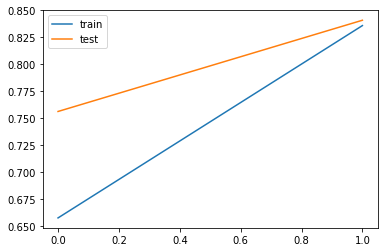

In [13]:
#model.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))


model = build_model(28, 28, 3, 6,0.5)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["acc"])
history=model.fit(x_train,y_train,epochs=2,validation_data=(x_test,y_test),verbose=0)

val_acc=history.history['val_acc']
acc=history.history['acc']

plt.plot(acc,label="train")
plt.plot(val_acc,label="test")
plt.legend()

plt.legend();

In [14]:
model.save('saved_model/my_model') 
#new_model = tf.keras.models.load_model('model_test)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [15]:
model.save('model_test') 

INFO:tensorflow:Assets written to: model_test/assets


In [16]:
new_model = tf.keras.models.load_model('model_test')


In [99]:
val_acc=history.history['val_acc']
acc=history.history['acc']

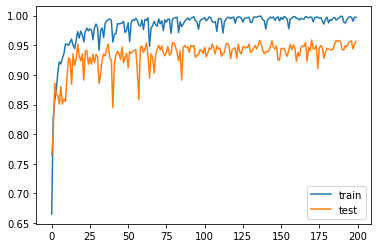

In [101]:
#plt.plot(val_acc)
#plt.plot(acc)


In [85]:
history=model.fit(x_train,y_train,epochs=1,validation_data=(x_test,y_test),verbose=1)

Train on 4772 samples, validate on 1194 samples
4772/4772 [==============================] - 3s 690us/sample - loss: 0.4596 - acc: 0.8676 - val_loss: 0.5414 - val_acc: 0.8283


In [44]:
history.history

{'loss': [0.02437857907419214],
 'acc': [0.99350375],
 'val_loss': [0.43194546471888096],
 'val_acc': [0.91457283]}

In [18]:
from sklearn import metrics
y_predict=new_model.predict(x_test).argmax(axis=1)
print(metrics.classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       787
           1       0.37      0.83      0.51        12
           2       0.83      0.87      0.85       206
           3       0.42      0.85      0.56        33
           4       0.37      0.68      0.48        19
           5       0.66      0.80      0.72       137

    accuracy                           0.84      1194
   macro avg       0.60      0.81      0.67      1194
weighted avg       0.88      0.84      0.85      1194



In [37]:
y_predict=model.predict(x_test).argmax(axis=1)
print(metrics.classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       706
           1       0.81      0.85      0.83        26
           2       0.87      0.88      0.88       214
           3       0.73      0.82      0.77        60
           4       0.66      0.66      0.66        35
           5       0.87      0.95      0.91       153

    accuracy                           0.91      1194
   macro avg       0.82      0.85      0.83      1194
weighted avg       0.91      0.91      0.91      1194



In [102]:
y_predict=model.predict(x_test).argmax(axis=1)
print(metrics.classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       695
           1       0.89      0.92      0.91        26
           2       0.94      0.94      0.94       214
           3       0.84      0.95      0.89        59
           4       0.83      0.85      0.84        34
           5       0.95      0.95      0.95       166

    accuracy                           0.96      1194
   macro avg       0.90      0.93      0.92      1194
weighted avg       0.96      0.96      0.96      1194



In [103]:
model.save("tf_essai")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: tf_essai/assets


In [104]:
from keras.models import load_model

In [107]:
import tensorflow as tf
from tensorflow import keras

In [106]:
#essai=load_model("tf_essai")
tf.keras.models.load_model("")

In [108]:
drop_out_5=tf.keras.models.load_model('tf_essai')


In [109]:
#Avec 0.5
y_predict=drop_out_5.predict(x_test).argmax(axis=1)
print(metrics.classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       695
           1       0.89      0.92      0.91        26
           2       0.94      0.94      0.94       214
           3       0.84      0.95      0.89        59
           4       0.83      0.85      0.84        34
           5       0.95      0.95      0.95       166

    accuracy                           0.96      1194
   macro avg       0.90      0.93      0.92      1194
weighted avg       0.96      0.96      0.96      1194



In [113]:
#0.2
y_predict=model.predict(x_test).argmax(axis=1)
print(metrics.classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       710
           1       0.96      0.84      0.90        31
           2       0.88      0.95      0.92       200
           3       0.81      0.89      0.84        61
           4       0.71      0.78      0.75        32
           5       0.91      0.94      0.93       160

    accuracy                           0.94      1194
   macro avg       0.88      0.89      0.88      1194
weighted avg       0.94      0.94      0.94      1194



In [115]:
batchImages_stack_reshape=[1,2,3,4,5]
liste_DIFF=[1,3]

In [116]:
batchImages_test = [batchImages_stack_reshape[i] for i in (liste_DIFF)]

In [118]:
batchImages_train = [batchImages_stack_reshape[i] for i not in (liste_DIFF)]

SyntaxError: invalid syntax (<ipython-input-118-b50d19896aef>, line 1)

In [120]:
set(batchImages_stack_reshape)-set(batchImages_test)

{1, 3, 5}

In [122]:
batchImages_test

[2, 4]

In [123]:
y_predict=model.predict(x_test).argmax(axis=1)
print(metrics.classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       692
           1       0.85      0.88      0.87        26
           2       0.94      0.90      0.92       224
           3       0.79      0.84      0.82        63
           4       0.71      0.78      0.75        32
           5       0.91      0.96      0.93       157

    accuracy                           0.94      1194
   macro avg       0.86      0.89      0.88      1194
weighted avg       0.94      0.94      0.94      1194

